# Finding the best market to adverts in e-learning

The aim of this project is to give exampples on how to use basic concepts in Statistics, such as mean values, medians, ranges, and standard deviations, to answer questions using real-world data. 
To be concrete, we will focus on Programming courses markets. 
Using a rea-world dataset, we will determine what are the best markets to advertise in and estimate the extent to which these results should be trusted.

## The dataset

The dataset we will use, `2017-fCC-New-Coders-Survey-Data.csv`, was downloaded from [this Github repository](https://github.com/freeCodeCamp/2017-new-coder-survey). 
It was used by Quincy Larson, founder of the e-learning platform (freeCodeCamp)[https://www.freecodecamp.org/], to write [this article on Medium](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/) about new coders (defined as people who had been coding for less than 5 years) in 2017. 
The questions asked in the survey can be found in `2017-fCC-New-Coders-Survey-Data_questions.csv`.

Let us first import the modules we will need:

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We then import the dataset, find its shape, and print the five first rows:

In [2]:
path_to_csv = '../Data/2017-fCC-New-Coders-Survey-Data.csv'
df = pd.read_csv(path_to_csv)
print(df.shape)
df.head()

(18175, 136)


/home/florent/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This dataframe has 18175 rows and 136 columns. 
Let us list them and their main properties: 

In [3]:
pd.set_option('display.max_columns', 200) # to print all columns
df.describe(include='all')

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,949,1073.000000,2314.000000,15354,1609.0,165.0,1708.0,290.0,297.0,1977.0,2472.0,446.0,1076.0,570,133.0,132.0,544.0,547.0,481.0,1753.0,9246,15382,15336,8116,1078,14345,835,7200.000000,3833.000000,4508.000000,15454,55,3858.000000,15291.000000,15329.000000,15380.000000,6397.000000,15256.000000,6402.000000,1371.000000,16714.000000,18175,15743,7623.000000,15293.000000,15222.000000,18068.000000,9223.000000,8138,3201.0,1470.0,1940.0,1092.0,4047.0,4831.0,1875.0,1560.0,2677.0,266,939.0,584.0,1691.0,13483,6503.000000,6992,8118,15344,15335,16577.000000,17084.000000,18175,18175,18175,15743,15743,403.0,1636.0,773.0,728.0,327.0,187.0,726.0,1123.0,1061.0,850,345.0,333.0,790.0,408.0,318.0,655.0,311.0,9390.0,1848.0,4402.0,4671.0,3243.0,1341.0,13803.0,2049.0,3800.0,2558.0,6417.0,976.0,1024,2392.0,452.0,11207.0,2260.0,3837.0,5120.0,9765.0,15368,8727,3362.000000,956.0,976.0,1397.0,1453.0,1847.0,2619.0,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,1214,201.0,2960.0
unique,NaN,NaN,NaN,NaN,141,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,6,181,172,14,724,10,383,NaN,NaN,NaN,5,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18175,15743,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177,NaN,NaN,NaN,7,NaN,3213,3,167,5,NaN,NaN,17738,18054,18065,15657,15654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,736,NaN,NaN
top,NaN,NaN,NaN,NaN,General Assembly,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,Marketing,Employ

## Job role interests

We first want to determine which jobs new coders are interested in, which will in turn determine the topics they should be interested in learning. 
To this end, we generate a relative frequency table for the `JobInterest` columns and represent it graphically as a bar plot.

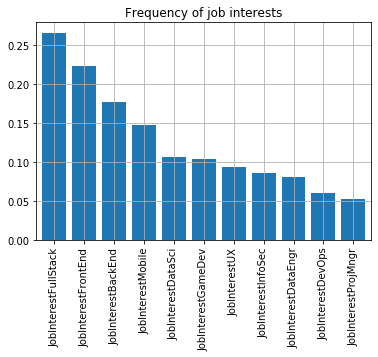

In [4]:
# number of bars in the plot
nbars = 11

# job interests with their own column
list_jobs = ['BackEnd', 'DataEngr', 'DataSci', 'DevOps', 'FrontEnd', 
             'FullStack', 'GameDev', 'InfoSec', 'Mobile', 'ProjMngr',
             'QAEngr', 'UX']
freqs = {}
nrows = df.shape[0]
for job in list_jobs: 
    name_col = 'JobInterest' + job
    freqs[name_col] = df[name_col].sum() / nrows
    
# job interests in the 'other' column
for job in df['JobInterestOther']:
    if pd.isna(job):
        pass
    elif job in freqs.keys(): 
        freqs[job] += 1 / nrows
    else:
        freqs[job] = 1 / nrows

# turn the dictionary to two lists, ordered by the y value in descending order
x, y = zip(*sorted(freqs.items(), key=lambda item: -item[1])) 
plt.bar(x, y)
plt.xlim(-0.6, nbars-0.4)
plt.xticks(rotation=90)
plt.grid()
plt.title('Frequency of job interests')
plt.show()

We find that:  
* a plurality (more than 20%) are interested in Full Stack roles,
* the next two most popular careers are Front End Developer and Back End Developer.

Let us now sum the values:

In [5]:
sum(y)

1.440055020632729

Values add up to more than 1.4, meaning that, on average, a new coder contemplates approximately 1.4 different careers. 
*It may thus be valuable to put forward learning opportunities which may lead to different careers.* 
To see this more precisely, let us plot the correlation map between expressions of interests in different career opportunities. 
For simplicity, we focus on those having their own columns, which from the graph above covers at least the 11 most popular career opportunities. 

In [6]:
df[['JobInterest' + job for job in list_jobs]].fillna(0).corr().style.background_gradient(cmap='coolwarm')

,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX
JobInterestBackEnd,1,0.312614,0.295317,0.303709,0.511133,0.522215,0.308078,0.293015,0.430606,0.176594,0.191777,0.250694
JobInterestDataEngr,0.312614,1,0.535955,0.268068,0.175431,0.235833,0.185993,0.301727,0.232597,0.197883,0.234314,0.173833
JobInterestDataSci,0.295317,0.535955,1,0.217026,0.183747,0.260703,0.177418,0.282107,0.206775,0.213141,0.190627,0.188622
JobInterestDevOps,0.303709,0.268068,0.217026,1,0.186346,0.236236,0.187513,0.342415,0.224842,0.146003,0.209947,0.15335
JobInterestFrontEnd,0.511133,0.175431,0.183747,0.186346,1,0.481471,0.32326,0.191983,0.439562,0.203686,0.188201,0.431349
JobInterestFullStack,0.522215,0.235833,0.260703,0.236236,0.481471,1,0.283603,0.234919,0.414502,0.194918,0.15592,0.293922
JobInterestGameDev,0.308078,0.185993,0.177418,0.187513,0.32326,0.283603,1,0.24672,0.395991,0.125137,0.14027,0.231363
JobInterestInfoSec,0.293015,0.301727,0.282107,0.342415,0.191983,0.234919,0.24672,1,0.259511,0.166299,0.220394,0.177062
JobInterestMobile,0.430606,0.232597,0.206775,0.224842,0.439562,0.414502,0.395991,0.259511,1,0.200384,0.166373,0.339876
JobInterestProjMngr,0.176594,0.197883,0.213141,0.146003,0.203686,0.194918,0.125137,0.166299,0.200384,1,0.202729,0.270089


There is a significant (larger than 0.4) positive correlation between interests in Full Stack, Front End, Back End, and Mobile development. 
Since these are also the four most popular career opportunities, *it would make sense to advertise e-learning content which can be useful to these four roles*.

There is also a significant correlation between interest for Data Scientist and Data Engineer careers, which are both among the ten most popular career opportunities. 
*It would thus also make sense to advertise content relevent to these two roles.*

## Best countries to advertise in

We now focus on the geographic location of new coders to determine which countries an advertising campaign should focus on. 
We focus on coders who have expressed interest for at least one of the 10 most popular careers and plot a frequency table of the `CountryLive` column, indicating in which country each new coder lives.

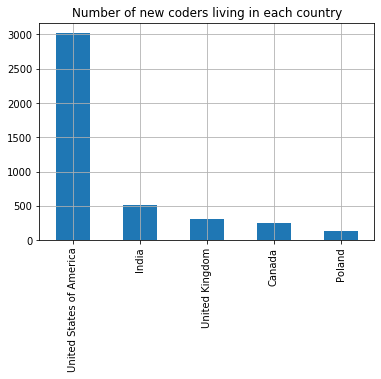

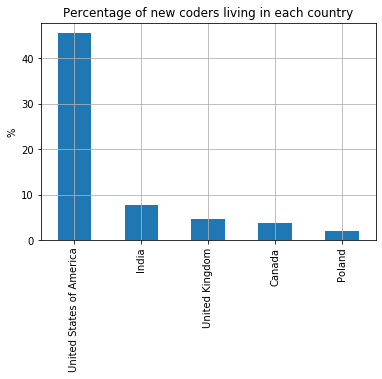

In [27]:
# list of the 10 most popular careers
most_popular_careers = list(x[:10])

# dataframe containing only the rows for coders having expressed interest in at 
# least one of the 10 most popular careers
df_interested_10 = df[df[most_popular_careers].sum(axis=1) > 0.]

# frequency table
freq_table_country = df_interested_10['CountryLive'].value_counts()
freq_table_country_per = df_interested_10['CountryLive'].value_counts(normalize=True) * 100

# bar plot of the frequency table, showing only the 5 most represented 
# countries

nbars = 5

freq_table_country.plot.bar()
plt.xlim(-0.5,nbars-0.5)
plt.grid()
plt.title('Number of new coders living in each country')
plt.show()

freq_table_country_per.plot.bar()
plt.xlim(-0.5,nbars-0.5)
plt.ylabel('%')
plt.grid()
plt.title('Percentage of new coders living in each country')
plt.show()

A plurality (more than 40%, corresponding to more than 3000 coders in the survey) of new coders live in the United States of America (USA).
The next two most represented countries are India and the United Kingdom (UK)with less than 10% each, followed by Canada and Poland.
Moreover, the first four are all English-speaking countries, which could make it easy to extent a campaign from one to another.
*An advertising campagign could thus start in the USA, before being potentially extended to India, the UK, Canada.* 

Let us check that the previous results about job interests remain true when restricting to coders living in the USA, which could be the primary target of a campaign.

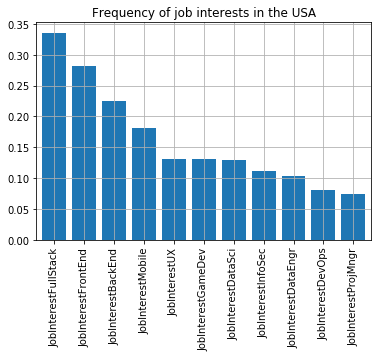

In [31]:
# number of bars in the plot
nbars = 11

# country where 
country = 'United States of America'

# number of rows
nrows_USA = df[df['CountryLive'] == country].shape[0]

# job interests with their own column
freqs_USA = {}
for job in list_jobs: 
    name_col = 'JobInterest' + job
    freqs_USA[name_col] = df[df['CountryLive'] == country][name_col].sum() / nrows_USA
    
# job interests in the 'other' column
for job in df[df['CountryLive'] == country]['JobInterestOther']:
    if pd.isna(job):
        pass
    elif job in freqs_USA.keys(): 
        freqs_USA[job] += 1 / nrows_USA
    else:
        freqs_USA[job] = 1 / nrows_USA

# turn the dictionary to two lists, ordered by the y value in descending order
x, y = zip(*sorted(freqs_USA.items(), key=lambda item: -item[1])) 
plt.bar(x, y)
plt.xlim(-0.6, nbars-0.4)
plt.xticks(rotation=90)
plt.grid()
plt.title('Frequency of job interests in the USA')
plt.show()

This frequency table looks very similar to the one obtaned above from the full dataset. 
All frequencies tend to be a bit larger, which does not affect ou conclusions. 
Let us check that the correlations we found above are also still present: 

In [32]:
df[df['CountryLive'] == country][['JobInterest' + job for job in list_jobs]].fillna(0).corr().style.background_gradient(cmap='coolwarm')

,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX
JobInterestBackEnd,1,0.317367,0.291474,0.313196,0.499242,0.53835,0.28848,0.29014,0.418744,0.16978,0.194625,0.231594
JobInterestDataEngr,0.317367,1,0.544246,0.284367,0.159697,0.218719,0.171934,0.287743,0.231894,0.149301,0.234309,0.15138
JobInterestDataSci,0.291474,0.544246,1,0.218136,0.165096,0.236407,0.171696,0.288883,0.191749,0.189245,0.181758,0.166819
JobInterestDevOps,0.313196,0.284367,0.218136,1,0.203868,0.228492,0.177307,0.35949,0.217793,0.107477,0.22345,0.135456
JobInterestFrontEnd,0.499242,0.159697,0.165096,0.203868,1,0.498286,0.322129,0.171166,0.436878,0.220395,0.208066,0.455125
JobInterestFullStack,0.53835,0.218719,0.236407,0.228492,0.498286,1,0.274613,0.2055,0.411241,0.192444,0.173926,0.299068
JobInterestGameDev,0.28848,0.171934,0.171696,0.177307,0.322129,0.274613,1,0.220586,0.370014,0.107563,0.151788,0.226605
JobInterestInfoSec,0.29014,0.287743,0.288883,0.35949,0.171166,0.2055,0.220586,1,0.26071,0.151097,0.212234,0.166449
JobInterestMobile,0.418744,0.231894,0.191749,0.217793,0.436878,0.411241,0.370014,0.26071,1,0.17826,0.162125,0.330991
JobInterestProjMngr,0.16978,0.149301,0.189245,0.107477,0.220395,0.192444,0.107563,0.151097,0.17826,1,0.178519,0.26862


There are still strong positive correlations between interest for the Full Stack, Front End, and Back End careers, as well as the data Scientist and Data Engineer ones.

Another important information for deciding which countries to invest in is how much coders are willign to pay for learning. 
To estimate it, we first add a new column `MoneyPerMonth` showing, in US Dollars, how much each coder has spent per month since started programming. 
It is obtained by dividng the `MoneyForLearning` column by the `MonthsProgramming` one, after replacing 0s in the later by 1s. 
(Since most subscriptions are monthly, one can expect the total amount spent by someone who has just started coding to be a fair estimation of what they pay for the first month.)

In [33]:
df['MoneyPerMonth'] = df['MoneyForLearning'] / df['MonthsProgramming'].replace(0, 1)

We then group the results by country and show summary statistics for the four ones where the number of new coders is highest.

In [87]:
# column to consider
column = 'MoneyPerMonth'

# countries to be considered
list_countries = ['United States of America', 'India', 'United Kingdom', 'Canada']

# dataframe grouped by country
df_country = df.groupby(['CountryLive'])[column]

# mean values
mean_money_per_month = df_country.mean()

# standard deviations
std_money_per_month = df_country.std()

# stanard errors
ste_money_per_month = std_money_per_month / np.sqrt(df_country.size())

phrase = '{}: mean = ${:.0f}±{:.0f}, std = ${:.0f}'
for country in list_countries: 
    print(phrase.format(country, mean_money_per_month[country], ste_money_per_month[country], std_money_per_month[country]))

United States of America: mean = $206±24, std = $1808
India: mean = $67±12, std = $442
United Kingdom: mean = $56±9, std = $239
Canada: mean = $118±15, std = $366


It seems that coders in the USA spend more for learning than coders in the other three countries on average. 
However, the large standard deviation may indicate that the result is biased by a few high-payers. 
Let us show box plots of the distributions of monthly spending in each of these four countries:

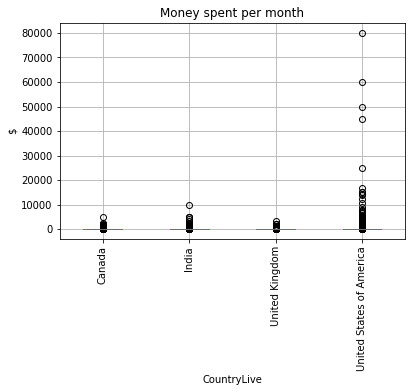

In [74]:
# dataframe grouped by country
df[df['CountryLive'].isin(list_countries)].boxplot(column, 'CountryLive')
plt.xticks(rotation=90)
plt.ylabel('$')
plt.title('Money spent per month')
plt.suptitle('')
plt.show()

There seems to be a significant number of outliers, which may well bias the analysis. 
To get a better sense of the data, let us focus on coders spending less than a given threshold, which we choose as $1000, as it is unlikely that many coders will spend more than that on learning each month. 
Higher values may point to misreportings, other errors, or a lot of money spent on attending bootcamps, which are not covered by our advertising campaign.

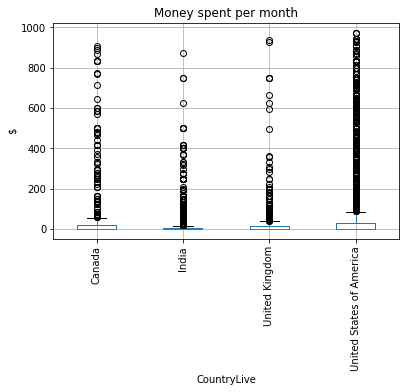

In [94]:
threshold = 1000

# dataframe grouped by country
df[(df['CountryLive'].isin(list_countries)) & (df[column] < threshold)].boxplot(column, 'CountryLive')
plt.xticks(rotation=90)
plt.ylabel('$')
plt.title('Money spent per month')
plt.suptitle('')
plt.show()

These box plots seem more sensible. 
We can alread see that more than half of new coders in each of these countries do not spend money on learning (the median is zero in all cases). 

Let us re-compute the means and standard deviations with this threshold:

In [95]:
# dataframe grouped by country, keepong only the rows where MoneyPerMonth is
# below the threshold
df_country = df[df[column] < threshold].groupby(['CountryLive'])[column]

# mean values
mean_money_per_month = df_country.mean()

# standard deviations
std_money_per_month = df_country.std()

# stanard errors
ste_money_per_month = std_money_per_month / np.sqrt(df_country.size())

phrase = '{}: mean = ${:.1f}±{:.1f}, std = ${:.1f}'
for country in list_countries: 
    print(phrase.format(country, mean_money_per_month[country], ste_money_per_month[country], std_money_per_month[country]))

United States of America: mean = $59.1±2.0, std = $146.8
India: mean = $21.9±2.1, std = $74.3
United Kingdom: mean = $29.4±3.6, std = $94.0
Canada: mean = $56.9±6.6, std = $154.9


The average amounts of money spent per month by new coders is largest in the USA and smallest in India.

## Conclusions

From this brief study, it seems clear that the best market to advertise in is the USA, and that the campaign should focus on skills relevent to Full Stack, Front End, and Back End development. 
Possible future extensions of the campaign, if successful, could include the UK, Canada, and India, as well as skills relevant to Data Science and Data Engineering. 

<font style="color:rgb(0,100,200)"><b> 
    To do: <ul>
    <li> investigate the outliers more carefully and remove them one by one </li>
    <li> compare with the <a ref=https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey>Stack Overflow 2018 Developer Survey</a> </li>
    </ul>
</b></font>